# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.4 MB/s eta 0:00:00


In [2]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [3]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [ ]:
cursor = con.cursor()

In [ ]:
sql = """
SELECT MAX(hire_date), MIN(hire_date)
FROM employees;
"""

In [ ]:
cursor.execute(sql)

In [ ]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

In [ ]:
cursor.close()

True

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [4]:
import pandas as pd

sql = """
SELECT s.emp_no, s.salary, s.from_date, s.to_date
FROM salaries AS s
JOIN (
    SELECT emp_no, MAX(to_date) AS max_to_date
    FROM salaries
    GROUP BY emp_no
) AS latest_salary
ON s.emp_no = latest_salary.emp_no AND s.to_date = latest_salary.max_to_date;
"""

cursor = con.cursor()
cursor.execute(sql)

data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

res = pd.DataFrame(data, columns=columns)

print("Назви колонок:", res.columns.tolist())
print("Розмір датафрейму:", res.shape)
print("Перші 3 записи:\n", res.head(3))

Назви колонок: ['emp_no', 'salary', 'from_date', 'to_date']
Розмір датафрейму: (300180, 4)
Перші 3 записи:
    emp_no  salary   from_date     to_date
0   10001   88958  2002-06-22  9999-01-01
1   10002   72527  2001-08-02  9999-01-01
2   10003   43311  2001-12-01  9999-01-01


In [ ]:
field_names = [i[0] for i in cursor.description]

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [12]:
print(type(res['to_date'].iloc[0]))

<class 'datetime.date'>


In [13]:
import datetime


end_date = datetime.date(9999, 1, 1)

# Підрахунок значень рівних `9999-01-01`
count_equal_9999 = res[res['to_date'] == end_date].shape[0]

# Підрахунок значень, що не дорівнюють `9999-01-01`
count_not_equal_9999 = res[res['to_date'] != end_date].shape[0]

# Вивід результатів
print(f"Кількість значень to_date рівних '9999-01-01': {count_equal_9999}")
print(f"Кількість значень to_date, що не рівні '9999-01-01': {count_not_equal_9999}")

Кількість значень to_date рівних '9999-01-01': 240124
Кількість значень to_date, що не рівні '9999-01-01': 60056


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

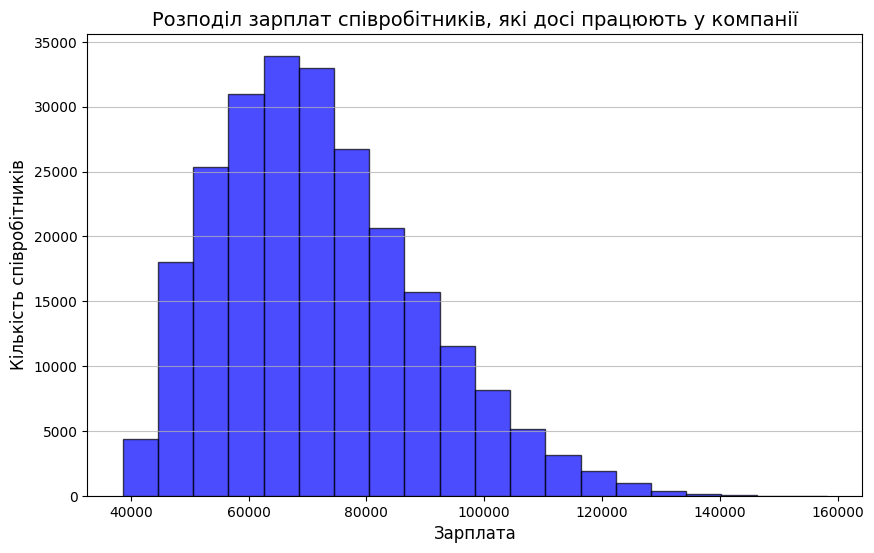

In [16]:
import matplotlib.pyplot as plt

current_employees = res[res['to_date'] == datetime.date(9999, 1, 1)]

plt.figure(figsize=(10, 6))
plt.hist(current_employees['salary'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Розподіл зарплат співробітників, які досі працюють у компанії', fontsize=14)
plt.xlabel('Зарплата', fontsize=12)
plt.ylabel('Кількість співробітників', fontsize=12)
plt.grid(axis='y', alpha=0.75)

plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [17]:
con.close()